In [1]:
import requests
import json
from DbConn import *
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

def day_dataframe():
    db = DbConn()
    
    select_query = """
    select b.dailydate - b.opendt, b.movienm, b.audiacc, m.max_audiacc
    from boxoffice2 b, movie2 m
    where b.dailydate - b.opendt >= 0 and m.moviecd = b.moviecd and m.max_audiacc >1000000
    order by b.moviecd, b.dailydate
    """
    
    select_result = db.execute(select_query)

    print("첫주 작업 완료. -----")
    db.disconnect()
    return  select_result


def movie2_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd,  max_audiacc, actors1_max, actors2_max, actors3_max, actors4_max,
    actors1_avg, actors2_avg, actors3_avg, actors4_avg,
    actors1_100cnt, actors2_100cnt, actors3_100cnt, actors4_100cnt,
    prod_max,prod_avg,prod_100cnt,
    genre_max,genre_avg,genre_100cnt,
    genresub_max,genresub_avg,genresub_100cnt,
    director_max,director_avg,director_100cnt
    
    from movie2
    where opendt < TO_DATE('19/01/01', 'YY/mm/dd') and opendt > TO_DATE('03/01/01', 'YY/mm/dd') 
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result


def screen_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd, scrncnt
    
    from boxoffice2
    where dailydate = opendt
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result

# def max_dataframe():
#     db = DbConn()
    
#     select_query = """
#     select moviecd,  max(audiacc)
#     from boxoffice 
#     group by moviecd
#     order by moviecd
#     """
#     select_result = db.execute(select_query)

#     print("누적 작업 완료. -----")
#     db.disconnect()
#     return  select_result

# print(week_dataframe(13))

print(day_dataframe())


첫주 작업 완료. -----
[(0, '태극기 휘날리며', 107386, 2544096), (1, '태극기 휘날리며', 188297, 2544096), (2, '태극기 휘날리며', 298269, 2544096), (3, '태극기 휘날리며', 408103, 2544096), (4, '태극기 휘날리며', 478799, 2544096), (5, '태극기 휘날리며', 547560, 2544096), (6, '태극기 휘날리며', 616087, 2544096), (7, '태극기 휘날리며', 683466, 2544096), (8, '태극기 휘날리며', 763244, 2544096), (9, '태극기 휘날리며', 886308, 2544096), (10, '태극기 휘날리며', 1005222, 2544096), (11, '태극기 휘날리며', 1061571, 2544096), (12, '태극기 휘날리며', 1114970, 2544096), (13, '태극기 휘날리며', 1165282, 2544096), (14, '태극기 휘날리며', 1211840, 2544096), (15, '태극기 휘날리며', 1266791, 2544096), (16, '태극기 휘날리며', 1355606, 2544096), (17, '태극기 휘날리며', 1444705, 2544096), (18, '태극기 휘날리며', 1487424, 2544096), (19, '태극기 휘날리며', 1526492, 2544096), (20, '태극기 휘날리며', 1564652, 2544096), (21, '태극기 휘날리며', 1602400, 2544096), (22, '태극기 휘날리며', 1647296, 2544096), (23, '태극기 휘날리며', 1723314, 2544096), (24, '태극기 휘날리며', 1812031, 2544096), (25, '태극기 휘날리며', 1886730, 2544096), (26, '태극기 휘날리며', 1904025, 2544096), (27, '태극기 휘날리며', 1919961, 25440

In [57]:

select_query = """
    
    select b.dailydate - b.opendt, b.movienm, b.audiacc, m.max_audiacc, m.distnm, m.actors1
    from boxoffice2 b, movie2 m
    where b.dailydate - b.opendt >= 0 and m.moviecd = b.moviecd and m.max_audiacc >1000000
    order by b.moviecd, b.dailydate
    """
db = DbConn()
df_day = pd.read_sql_query(select_query, db.connection)
df_day.head()

,B.DAILYDATE-B.OPENDT,MOVIENM,AUDIACC,MAX_AUDIACC,DISTNM,ACTORS1
0,0,태극기 휘날리며,107386,2544096,(주)쇼박스,장동건
1,1,태극기 휘날리며,188297,2544096,(주)쇼박스,장동건
2,2,태극기 휘날리며,298269,2544096,(주)쇼박스,장동건
3,3,태극기 휘날리며,408103,2544096,(주)쇼박스,장동건
4,4,태극기 휘날리며,478799,2544096,(주)쇼박스,장동건


In [37]:
movie_name_list = df_day.MOVIENM.unique()


In [4]:
# df['sum_total_people'].describe()
print(df_day['MAX_AUDIACC'].quantile(q=0.9, interpolation='nearest'),
      df_day['MAX_AUDIACC'].quantile(q=0.8, interpolation='nearest'),
      df_day['MAX_AUDIACC'].quantile(q=0.7, interpolation='nearest'),
      df_day['MAX_AUDIACC'].quantile(q=0.6, interpolation='nearest'),
      df_day['MAX_AUDIACC'].quantile(q=0.5, interpolation='nearest'),
      df_day['MAX_AUDIACC'].quantile(q=0.4, interpolation='nearest'),
      df_day['MAX_AUDIACC'].quantile(q=0.3, interpolation='nearest'),
      df_day['MAX_AUDIACC'].quantile(q=0.2, interpolation='nearest'),
      df_day['MAX_AUDIACC'].quantile(q=0.1, interpolation='nearest'),
      df_day['MAX_AUDIACC'].quantile(q=0, interpolation='nearest')
     )

a = df_day['MAX_AUDIACC'].quantile(q=0.9, interpolation='nearest')
b = df_day['MAX_AUDIACC'].quantile(q=0.8, interpolation='nearest')
c = df_day['MAX_AUDIACC'].quantile(q=0.7, interpolation='nearest')
d = df_day['MAX_AUDIACC'].quantile(q=0.6, interpolation='nearest')
e = df_day['MAX_AUDIACC'].quantile(q=0.5, interpolation='nearest')
f = df_day['MAX_AUDIACC'].quantile(q=0.4, interpolation='nearest')
g = df_day['MAX_AUDIACC'].quantile(q=0.3, interpolation='nearest')
h = df_day['MAX_AUDIACC'].quantile(q=0.2, interpolation='nearest')
i = df_day['MAX_AUDIACC'].quantile(q=0.1, interpolation='nearest')
j = df_day['MAX_AUDIACC'].quantile(q=0, interpolation='nearest')

# a = 10000000
# b = 5000000
# c = 1000000
# d = 130000
# e = 0


# 1% 1000만
# 4% 500만
# 24% 100만
# 65% 13만
# 100% 0

7500179 5295056 4036212 3031761 2586217 2116245 1740831 1459922 1199895 1001207


In [5]:
score_list = []
for q in df_day['MAX_AUDIACC']:
    if q >= a:
        score_list.append(0)
    elif q >= b:
        score_list.append(1)
    elif q >= c:
        score_list.append(2)
    elif q >= d:
        score_list.append(3)
    elif q >= e:
        score_list.append(4)
    elif q >= f:
        score_list.append(5)
    elif q >= g:
        score_list.append(6)
    elif q >= h:
        score_list.append(7)
    elif q >= i:
        score_list.append(8)
    else :
        score_list.append(9)
   

df_day['score'] = score_list
df_day['score'].head()

0    5
1    5
2    5
3    5
4    5
Name: score, dtype: int64

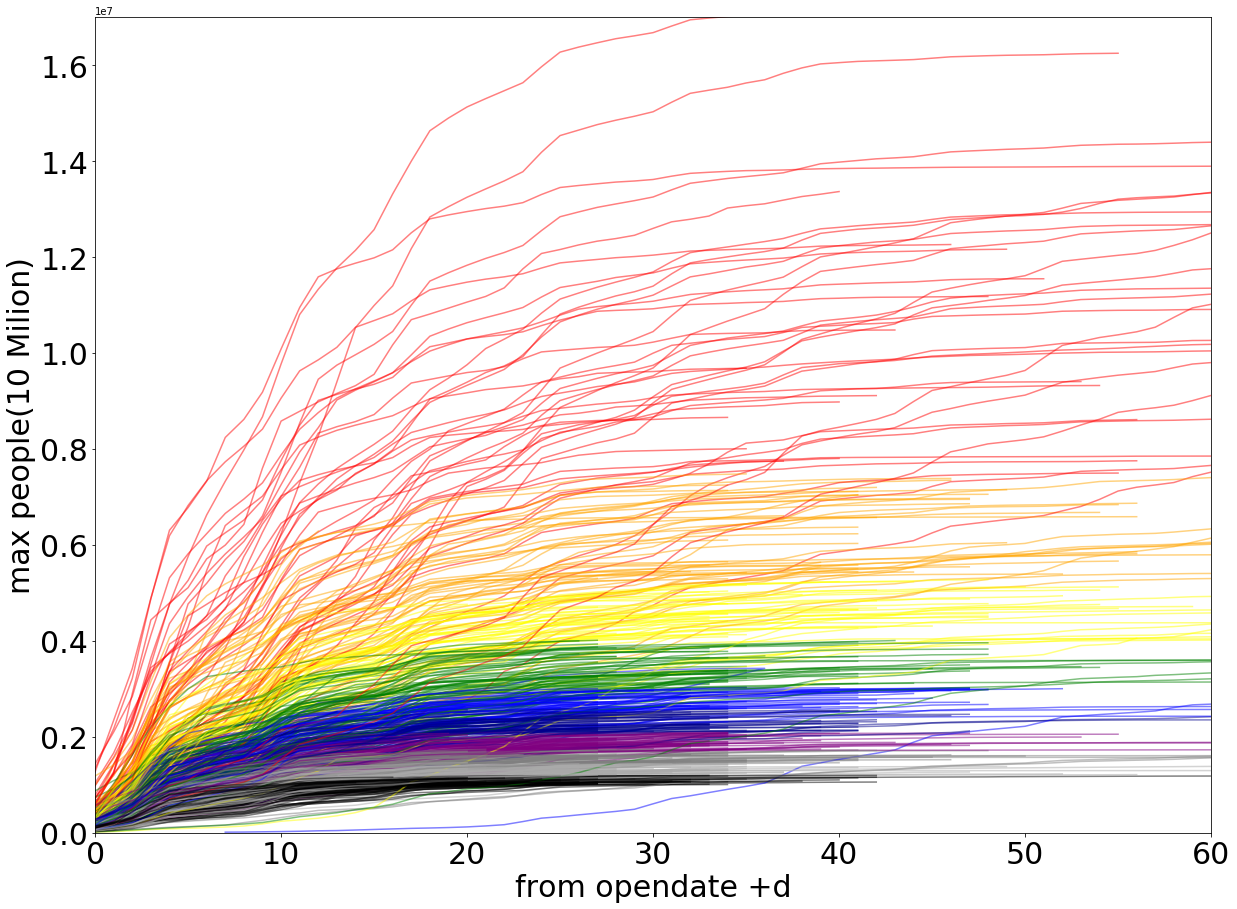

In [6]:
from matplotlib import cm
import numpy as np
fig = plt.figure(figsize=(20,15))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim(0,60)
plt.ylim(0,17000000)
plt.xlabel('from opendate +d', size=30)
plt.ylabel('max people(10 Milion)', size=30)
clist = ['red','orange','yellow','green','blue','darkblue','purple','gray','darkgray','black']
# plt.colorbar()
for i in movie_name_list:
    x_values = df_day[df_day['MOVIENM']==i]['B.DAILYDATE-B.OPENDT']
    y_values = df_day[df_day['MOVIENM']==i]['AUDIACC']
    plt.plot(x_values, y_values, alpha=0.5, color=clist[int(df_day[df_day['MOVIENM']==i]['score'].mean())])
plt.savefig('color_rank.png')
plt.show()
# 

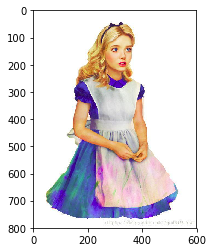

In [7]:
import numpy as np
from PIL import Image
from wordcloud import STOPWORDS
from wordcloud import WordCloud
fox_mask = np.array(Image.open("alice.jpeg"))
stopwords = set(STOPWORDS)
stopwords.add("said")
plt.imshow(fox_mask,cmap=plt.cm.gray, interpolation='nearest')

<Figure size 432x288 with 0 Axes>

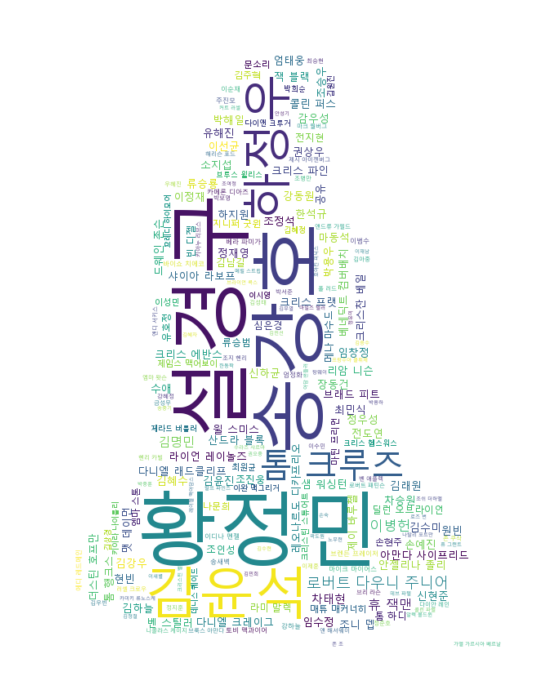

In [58]:
text = df_day.ACTORS1.value_counts()
wordcloud = WordCloud(background_color="white", mask=fox_mask,    max_font_size=100,
                     font_path='c:\windows\font\malgun.ttf').generate_from_frequencies(text)

fig = plt.figure()
# plt.rc('font', family='Malgun Gothic.ttf')
# plt.imshow(wordcloud, interpolation='nearest')

plt.savefig('./wordcloud1.svg')
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('./wordcloud1.svg')
plt.show()

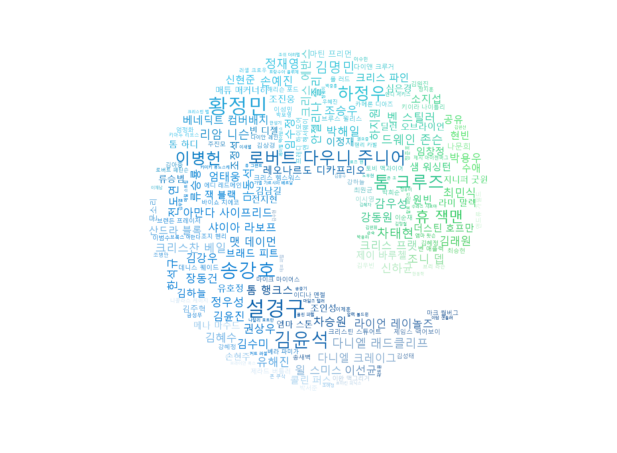

In [84]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Generate a word cloud image
mask = np.array(Image.open("movie.jpg"))
wordcloud = WordCloud(background_color="white", mask=mask, mode="RGBA",    max_font_size=50,
                     font_path='c:\windows\font\malgun.ttf').generate_from_frequencies(text)


# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("word.png", format="png")

plt.show()